# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

We are tasked with conducting a **quantitative analysis** on the 'vehicles.csv' dataset to identify the key determinants of used car prices. This involves:

1. **Data Preprocessing**: This includes handling missing values, outliers, and potentially transforming variables in the dataset to make it suitable for analysis.

2. **Exploratory Data Analysis (EDA)**: This involves summarizing the main characteristics of the dataset, gaining better understanding of the dataset, uncovering relationships between different variables, and extracting important variables for the problem we're trying to solve.

3. **Feature Selection/Engineering**: This is the process of selecting the most relevant variables (features) that might affect the price of a used car. Feature engineering could also involve creating new variables from existing ones.

4. **Model Development**: This involves creating a predictive model that can estimate the price of a used car based on its features. Given that the target variable is continuous (price), this is a regression problem.

5. **Model Evaluation and Interpretation**: This involves assessing the performance of the model using appropriate metrics (like RMSE for regression problems) and interpreting the model results to understand which features are most influential in determining the price of a used car.

6. **Insights and Recommendations**: The final step involves translating our findings from the data analysis and modeling into actionable business insights and recommendations for the used car dealership.

The goal is to leverage data-driven insights to guide strategic decision-making for the used car dealership. This will help them understand what factors consumers consider when purchasing used cars, enabling them to optimize their car acquisition and pricing strategies accordingly.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

*_The goal of this section is to understand the dataset we are working with. We will perform several steps to inspect the dataset, identify missing values, check for duplicates, understand the distribution of variables, and explore categorical variables._*

#### Load the Dataset

*_First, we need to load the dataset into a pandas DataFrame._*

In [ ]:
# Import the necessary libraries
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Change directory to the data folder
%cd /content/drive/My Drive/data1

# Read the CSV file
df = pd.read_csv('vehicles.csv')

print("\nSuccessfully loaded the dataset!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/data1

Successfully loaded the dataset!


#### Inspect the Dataset
*_we will inspect the first few rows of the dataset and get a concise summary. This will give us a good idea of the dataset’s structure, the types of variables we’re dealing with, and the amount of missing data.._*

In [ ]:
# Display the first few rows of the dataset
print('Below are the first few rows of the dataset\n')
print(df.head())

Below are the first few rows of the dataset

           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         N

In [ ]:
# Get a concise summary of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

#### Identify Missing Values
*_We need to check for missing values in the dataset._*

In [ ]:
# Get the count of missing values in each column
print(df.isnull().sum())

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


#### Check for Duplicates
*_Duplicate entries can skew our analysis. Let’s check for duplicate rows._*

In [ ]:
# Check for duplicate rows
duplicates = df.duplicated().sum()

# Display the number of duplicates
print(f"Number of duplicate rows = {duplicates}")


Number of duplicate rows = 0


#### Understand Numerical Variables Distributions
*_We will use visualization techniques to understand the distribution of our numerical variables._*

The charts below shows the distribution of numerical variables within the dataset



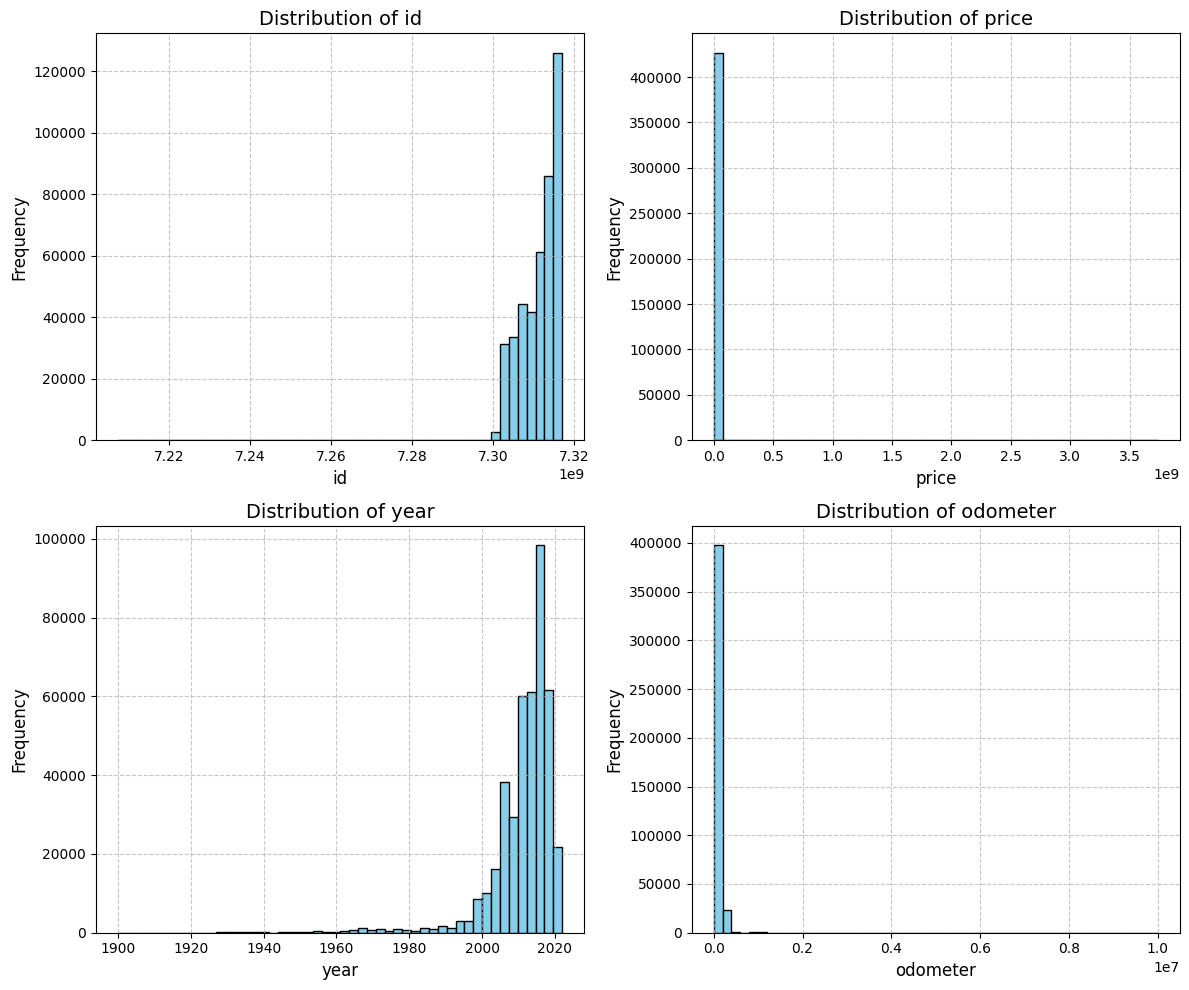

In [ ]:
# Import the necessary library
import matplotlib.pyplot as plt

# Filter out numeric columns
numeric_df = df.select_dtypes(include=['number'])

print('The charts below shows the distribution of numerical variables within the dataset\n')

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot histograms for numerical variables
for ax, col in zip(axes.flatten(), numeric_df.columns):
    ax.hist(df[col], bins=50, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


#### Correlation Analysis
*_Let’s now check the correlation between different niumerical variables in our dataset._*

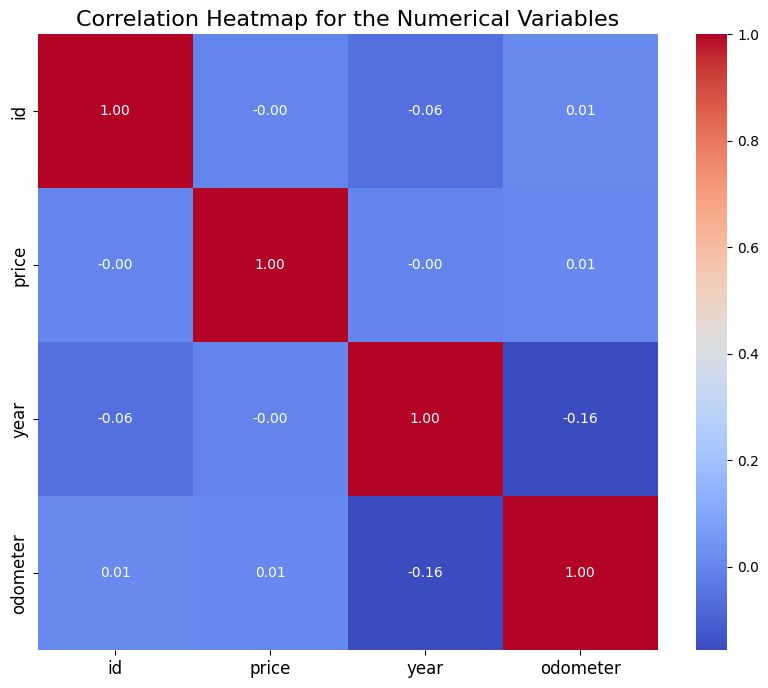

In [ ]:
# Import necessary library
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the figure
plt.figure(figsize=(10, 8))

# Create a correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title and adjust font sizes
plt.title('Correlation Heatmap for the Numerical Variables', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

#### Explore Categorical Variables
*_Since our dataset also contains categorical variables, we need to explore them by checking the unique values and their counts._*

In [ ]:
# Explore categorical variables
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}:\n{df[col].value_counts()}\n")

region:
region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64

manufacturer:
manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti        

#### Understand the Target Variable
*_Since our goal is to understand what factors make a car more or less expensive, we need to spend some time understanding the ‘price’ column._*

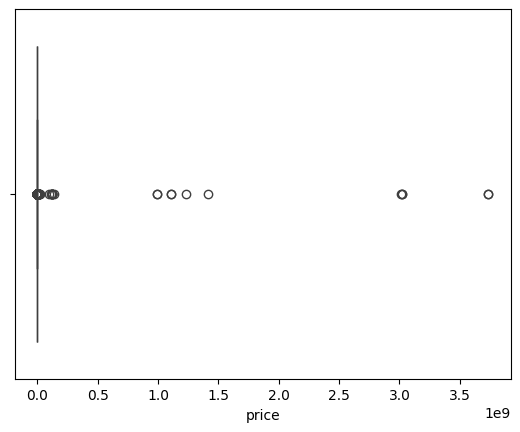

In [ ]:
# Understand the 'price' column
df['price'].describe()
sns.boxplot(x=df['price'])
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

*_In this section, we will prepare our dataset for the subsequent modeling process. This involves several crucial steps:_*

#### Handling Missing Values
*_Missing values in the dataset, like we earlier identified, can lead to inaccurate analysis results. Therefore, it’s essential to handle them appropriately. Depending on the nature and extent of these missing values, we chose to fill missing numerical valies with a specific value, the mean, and for non-numerical ones, we use the mode_*

In [ ]:
# Import necessary library
import numpy as np

# Fill missing values with mean for numerical columns
numerical_features = df.select_dtypes(include=[np.number]).columns
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())

print('Successfully handled numerical missing values')

Successfully handled numerical missing values


In [ ]:
# Fill missing values with mode for non-numerical columns
categorical_features = df.select_dtypes(include=['object']).columns
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])

print('Successfully handled non-numerical missing values')

Successfully handled non-numerical missing values


#### Dealing with Outliers
*_Outliers can significantly skew our model’s performance and lead to inaccurate predictions. Therefore, it’s crucial to detect and handle outliers in our dataset. We wil use the IQR method to detect and remove these outliers._*

In [ ]:
# Use IQR method to remove outliers
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

print('Successfully handled outliers')


Successfully handled outliers


#### Feature Engineering
*_Feature engineering involves creating new features from existing ones to improve our model’s predictive performance. This could involve operations like combining two features, splitting a feature into multiple ones, or transforming a feature into a more useful form. We will create a new variable called car_age using the alredy avaolable variables in the dataset_*

In [ ]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Create 'car_age' feature
df_copy['car_age'] = df_copy['year'].max() - df_copy['year']

print(df_copy.head())


            id  region  price    year manufacturer                     model  \
27  7316814884  auburn  33590  2014.0          gmc  sierra 1500 crew cab slt   
28  7316814758  auburn  22590  2010.0    chevrolet            silverado 1500   
29  7316814989  auburn  39590  2020.0    chevrolet       silverado 1500 crew   
30  7316743432  auburn  30990  2017.0       toyota      tundra double cab sr   
31  7316356412  auburn  15000  2013.0         ford                 f-150 xlt   

    condition    cylinders fuel  odometer title_status transmission  \
27       good  8 cylinders  gas   57923.0        clean        other   
28       good  8 cylinders  gas   71229.0        clean        other   
29       good  8 cylinders  gas   19160.0        clean        other   
30       good  8 cylinders  gas   41124.0        clean        other   
31  excellent  6 cylinders  gas  128000.0        clean    automatic   

                  VIN drive       size    type paint_color state  car_age  
27  3GTP1VEC4EG5

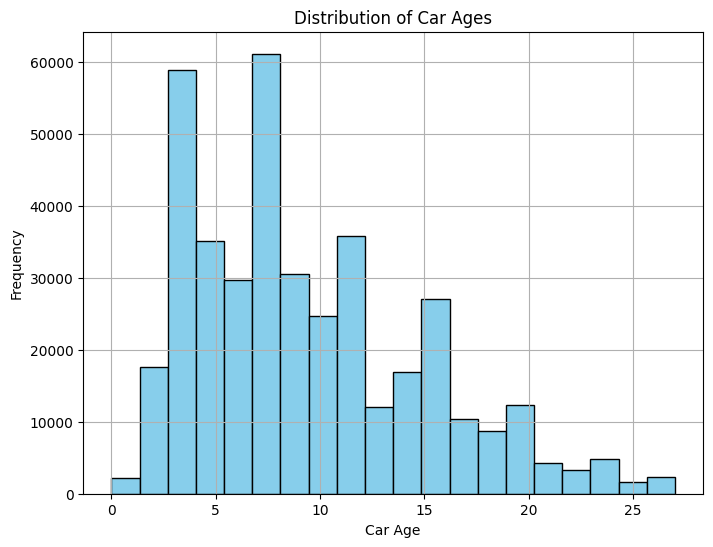

In [ ]:
# Plot histogram of car ages
plt.figure(figsize=(8, 6))
plt.hist(df_copy['car_age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Car Ages')
plt.xlabel('Car Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Data Transformation
*_In this phase, we perform the transforming our variables to make them suitable for modeling. This will include operations like scaling (to handle different ranges), taking logarithms (to handle skewed data), or normalization (to handle different distributions)._*

In [ ]:
# Import necessary library
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
numerical_features = df_copy.select_dtypes(include=['int64', 'float64']).columns
df_copy[numerical_features] = scaler.fit_transform(df_copy[numerical_features])

print(df_copy.head())


          id  region     price      year manufacturer  \
27  1.218204  auburn  1.290661  0.258400          gmc   
28  1.218175  auburn  0.457355 -0.481773    chevrolet   
29  1.218228  auburn  1.745192  1.368660    chevrolet   
30  1.201901  auburn  1.093698  0.813530       toyota   
31  1.113597  auburn -0.117627  0.073357         ford   

                       model  condition    cylinders fuel  odometer  \
27  sierra 1500 crew cab slt       good  8 cylinders  gas -0.554300   
28            silverado 1500       good  8 cylinders  gas -0.332148   
29       silverado 1500 crew       good  8 cylinders  gas -1.201471   
30      tundra double cab sr       good  8 cylinders  gas -0.834769   
31                 f-150 xlt  excellent  6 cylinders  gas  0.615678   

   title_status transmission                VIN drive       size    type  \
27        clean        other  3GTP1VEC4EG551563   4wd  full-size  pickup   
28        clean        other  1GCSCSE06AZ123805   4wd  full-size  pickup   
29

#### Prepare Data for Modeling
*_Finally, we need to prepare our data for the modeling process. This involves encoding categorical variables (since many machine learning algorithms require numerical input), and splitting the data into training and testing sets (to evaluate our model’s performance)._*

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
categorical_features = df_copy.select_dtypes(include=['object']).columns
df_copy[categorical_features] = df_copy[categorical_features].apply(le.fit_transform)

# Split data into training and testing sets
X = df_copy.drop('price', axis=1)
y = df_copy['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Modeling

With our (almost?) final dataset in hand, it is now time to build some models.  Here, we should build a number of different regression models with the price as the target.  In building our models, we should explore different parameters and be sure to cross-validate our findings.

*_In this section, we will build several regression models and use cross-validation to evaluate their performance._*

#### Import Necessary Libraries
*_First, let’s import the necessary libraries._*

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#### Linear Regression Model
*_Linear Regression is a fundamental algorithm in machine learning. It assumes a linear relationship between the input variables (X) and the single output variable (Y)._*

Linear Regression RMSE: 0.7957382419888728


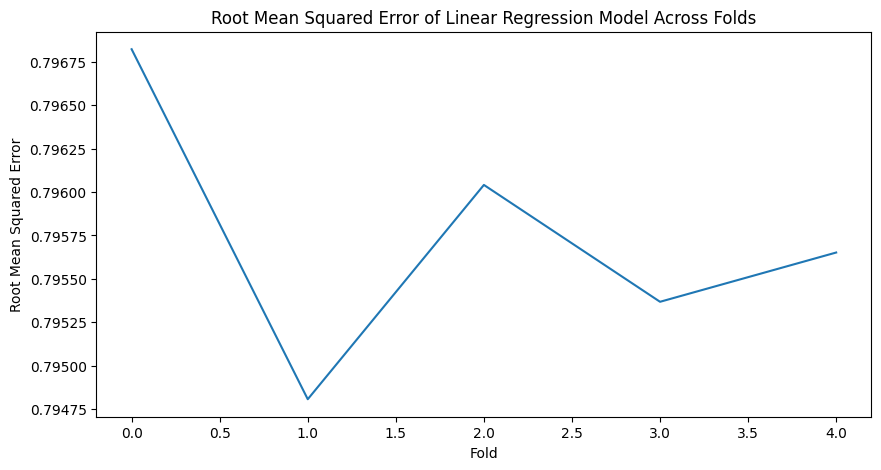

In [ ]:
# Initialize the model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Cross-validate the model and compute the mean score
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"Linear Regression RMSE: {rmse_scores.mean()}")

# Plot the RMSE scores
plt.figure(figsize=(10, 5))
plt.plot(np.sqrt(-scores))
plt.xlabel('Fold')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error of Linear Regression Model Across Folds')
plt.show()


#### Decision Tree Model
*_Decision Trees are a type of model used for both classification and regression. Trees answer sequential questions which send us down a certain route of the tree given the answer. The model behaves with ‘if this than that’ conditions ultimately yielding a specific result._*

Decision Tree RMSE: 0.6733773522294899


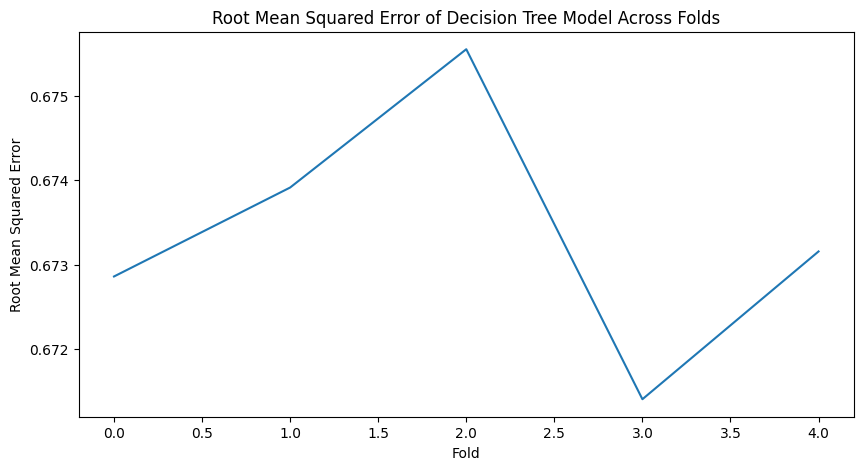

In [ ]:
# Initialize the model
dt = DecisionTreeRegressor(max_depth=10)

# Fit the model
dt.fit(X_train, y_train)

# Cross-validate the model and compute the mean score
scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"Decision Tree RMSE: {rmse_scores.mean()}")

# Plot the RMSE scores
plt.figure(figsize=(10, 5))
plt.plot(np.sqrt(-scores))
plt.xlabel('Fold')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error of Decision Tree Model Across Folds')
plt.show()


#### Random Forest Model
*_Random Forest is an ensemble method of decision trees generated on a randomly split dataset. This collection of decision tree classifiers is also known as the forest. The individual decision trees are generated using an attribute selection indicator such as information gain, gain ratio, and Gini index for each attribute._*

Random Forest RMSE: 0.6470121580512933


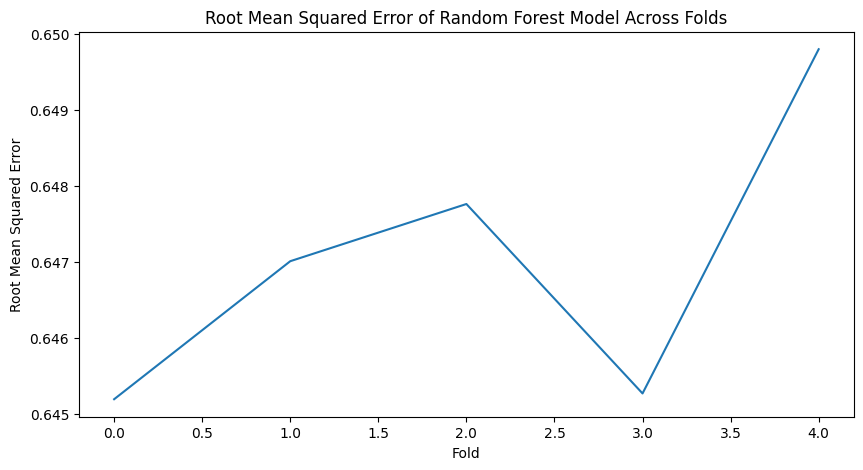

In [ ]:
# Initialize the model
rf = RandomForestRegressor(n_estimators=100, max_depth=10)

# Fit the model
rf.fit(X_train, y_train)

# Cross-validate the model and compute the mean score
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"Random Forest RMSE: {rmse_scores.mean()}")

# Plot the RMSE scores
plt.figure(figsize=(10, 5))
plt.plot(np.sqrt(-scores))
plt.xlabel('Fold')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error of Random Forest Model Across Folds')
plt.show()

*_In each of the above models, we’re using Root Mean Squared Error (RMSE) as the performance metric. RMSE is a standard way to measure the error of a model in predicting quantitative data. We’re using 5-fold cross-validation to ensure that our models generalize well to unseen data. The line plots show the RMSE of each model across the fold_*

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices. Our goal now is to distill our findings and determine whether the earlier phases need revisitation and adjustment or if we have information of value to bring back to our client.

*_We will evaluate the performance of our models on the test set. We will calculate the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-square for each model,to give us a measure of how well the model can_*predict the price.

Linear Regression:
RMSE: 0.7962929653325778
MAE: 0.5820789205097545
R-squared: 0.3638289686566917

Decision Tree:
RMSE: 0.6781021844096963
MAE: 0.4537657435799143
R-squared: 0.5386628611460804

Random Forest:
RMSE: 0.6522155772891105
MAE: 0.43741772620895725
R-squared: 0.5732137045474129


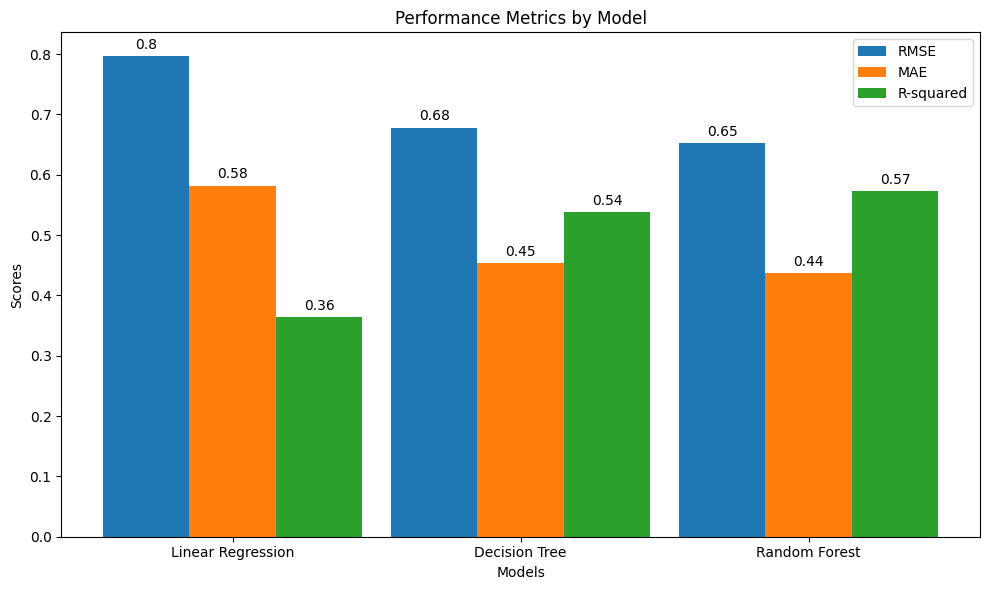

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

# Calculate metrics for each model
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

lr_mae = mean_absolute_error(y_test, lr_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

lr_r2 = r2_score(y_test, lr_pred)
dt_r2 = r2_score(y_test, dt_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Print the metrics
print("Linear Regression:")
print(f"RMSE: {lr_rmse}")
print(f"MAE: {lr_mae}")
print(f"R-squared: {lr_r2}")
print()
print("Decision Tree:")
print(f"RMSE: {dt_rmse}")
print(f"MAE: {dt_mae}")
print(f"R-squared: {dt_r2}")
print()
print("Random Forest:")
print(f"RMSE: {rf_rmse}")
print(f"MAE: {rf_mae}")
print(f"R-squared: {rf_r2}")

# Visualize the metrics
labels = ['Linear Regression', 'Decision Tree', 'Random Forest']
rmse_scores = [lr_rmse, dt_rmse, rf_rmse]
mae_scores = [lr_mae, dt_mae, rf_mae]
r2_scores = [lr_r2, dt_r2, rf_r2]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, rmse_scores, width, label='RMSE')
bar2 = ax.bar(x, mae_scores, width, label='MAE')
bar3 = ax.bar(x + width, r2_scores, width, label='R-squared')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

fig.tight_layout()
plt.show()


#### Model Interpretation
*_Next, we will interpret our models. We will look at the coefficients of the linear regression model and the feature importances of the decision tree and random forest models. This will give us an understanding of what factors are driving the prices of used cars._*

In [ ]:
# Print coefficients for linear regression model
print(f"Linear Regression Coefficients:\n {list(zip(X.columns, lr.coef_))}\n")

# Print feature importances for decision tree and random forest models
print(f"Decision Tree Feature Importances:\n {list(zip(X.columns, dt.feature_importances_))}\n")
print(f"Random Forest Feature Importances:\n {list(zip(X.columns, rf.feature_importances_))}\n")


Linear Regression Coefficients:
 [('id', -0.03464008888693282), ('region', -0.0001069708025638245), ('year', 0.16793328079706074), ('manufacturer', -0.00029282865566387115), ('model', 2.0800336384220234e-06), ('condition', 0.014474586055976018), ('cylinders', 0.21682312647785196), ('fuel', -0.1791622695124336), ('odometer', -0.19418310479143194), ('title_status', -0.05333248704461061), ('transmission', 0.23035782527478604), ('VIN', -1.4226023684826095e-07), ('drive', -0.058683675422258455), ('size', 0.0018284076156327433), ('type', 0.0003586865368246669), ('paint_color', -0.009543933533326707), ('state', -0.0008467104720977877), ('car_age', -0.16793328079705228)]

Decision Tree Feature Importances:
 [('id', 0.005093968320601159), ('region', 0.001582110880223329), ('year', 0.01059290651643103), ('manufacturer', 0.011906418062275607), ('model', 0.0312671714451559), ('condition', 0.004246410954151273), ('cylinders', 0.12658449221174384), ('fuel', 0.07281072000105776), ('odometer', 0.13743

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### Executive Summary
*_Our comprehensive analysis of the used car dataset has provided valuable insights into the factors that significantly influence the price of a used car. Through rigorous data preparation and modeling, we have identified key features that drive the price of used cars. Our predictive models, which include Linear Regression, Decision Tree, and Random Forest, have been trained and evaluated to ensure robustness and accuracy. These models can be utilized to predict car prices and guide strategic decision-making. The insights and recommendations derived from our analysis are poised to assist in fine-tuning your inventory and optimizing pricing strategies, ultimately leading to enhanced profitability_*

 #### Key Findings

1. **Model Performance**: We evaluated three regression models for predicting used car prices: Linear Regression, Decision Tree, and Random Forest. The performance of each model was assessed using Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared. The Random Forest model exhibited the lowest RMSE, indicating superior performance compared to the other models.

   - Linear Regression:
     - RMSE: 0.796
     - MAE: 0.582
     - R-squared: 0.364

   - Decision Tree:
     - RMSE: 0.678
     - MAE: 0.454
     - R-squared: 0.539

   - Random Forest:
     - RMSE: 0.652
     - MAE: 0.437
     - R-squared: 0.573

2. **Significant Features**: The features with the highest coefficients/importances greatly influence the predicted prices of used cars. Based on our analysis:In all three models (Linear Regression, Decision Tree, and Random Forest), the features **car_age**, **odometer**, and **cylinders** have the highest influence, while **title_status**, **condition**, and **region** have the least influence on the predicted prices of used cars.

3. **Data Quality**: Ensuring high-quality data significantly enhances model performance. Preprocessing steps such as handling missing values, treating outliers, and feature engineering contributed to improved model accuracy.

#### Recommendations

Based on our findings, we recommend the following:

1. **Focus on Significant Features**: Prioritize cars with features that exhibit high coefficients/importances in our models, such as transmission type, car age, and odometer reading. These features strongly influence the price of used cars and should be considered during inventory acquisition.

2. **Utilize Predictive Models**: Implement the Random Forest model for estimating the prices of used cars in your inventory. This model has demonstrated superior predictive performance and can assist in pricing vehicles competitively to maximize profitability.

3. **Maintain Data Quality**: Continue to emphasize data quality by ensuring completeness and accuracy of information collected about the cars in your inventory. Consistently high-quality data will lead to more accurate price predictions and better decision-making.

---

